<h1>Features of Stock Data</h1>

In [1]:
pip install TA-Lib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", message="Series.__getitem__ treating keys as positions is deprecated")
warnings.filterwarnings("ignore","UserWarning")

In [3]:
import pandas as pd

In [4]:
stock = pd.read_csv("AppleCompanyStock.csv")

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    950 non-null    int64  
 1   month   950 non-null    int64  
 2   open    950 non-null    float64
 3   high    950 non-null    float64
 4   low     950 non-null    float64
 5   close   950 non-null    float64
 6   volume  950 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 52.1 KB


In [6]:
stock.head()

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.470,173.66,175.82,46812368
1,2018,3,180.29,183.500,177.62,178.02,151720299
2,2018,3,175.21,180.000,174.27,179.98,138442235
3,2018,3,176.35,180.615,172.45,176.21,196432091
4,2018,2,172.05,175.650,171.01,175.50,133197874


In [7]:
stock.tail()

,year,month,open,high,low,close,volume
945,2000,2,108.00,117.12,105.94,108.75,14859900
946,2000,2,101.00,110.00,94.50,108.00,21289500
947,2000,1,108.44,114.19,100.62,101.62,18470300
948,2000,1,101.00,121.50,100.44,111.31,30213200
949,2000,1,102.00,102.25,86.50,100.44,29872700


In [8]:
stock.describe()

,year,month,open,high,low,close,volume
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,2008.631579,6.497895,168.952003,174.218120,164.176523,169.350997,1.092915e+08
std,5.259449,3.463112,167.253584,171.648176,163.694731,167.548177,8.144325e+07
min,2000.000000,1.000000,13.130000,13.630000,12.720000,13.120000,5.515100e+06
25%,2004.000000,3.000000,46.232500,48.335000,44.840000,46.130000,4.347195e+07
50%,2009.000000,6.500000,111.405000,114.735000,108.230000,111.940000,9.234840e+07
75%,2013.000000,9.750000,195.610000,202.487500,190.272500,195.240000,1.511180e+08
max,2018.000000,12.000000,699.350000,705.070000,693.620000,700.095000,5.003630e+08


## Univariate and Bivariate Analysis(EDA)

#### Filter out closing price and volume

In [9]:
stock = stock.loc[:,["year", "month", "close", "volume"]]
stock.head()

,year,month,close,volume
0,2018,3,175.82,46812368
1,2018,3,178.02,151720299
2,2018,3,179.98,138442235
3,2018,3,176.21,196432091
4,2018,2,175.50,133197874


#### Take the last closing price and vloume for each month

Before we start to analyse our data we need a single data point for each month and year. We will use the **last** value for each month for doing so. The reason we are not averaging it out is because we can loose important information that way. We will look into this shortly.

In [10]:
import numpy as np

In [11]:
stock_agg = stock.groupby(["year","month"]).tail(1)
stock_agg.head()

,year,month,close,volume
3,2018,3,176.21,196432091
7,2018,2,160.50,248091289
11,2018,1,175.00,99095223
16,2017,12,171.05,166555527
20,2017,11,172.50,203892677


In [12]:
stock_agg = stock_agg.sort_values(by=["year", "month"],ascending=True).reset_index()
stock_agg.drop(axis=1,columns='index',inplace=True)
stock_agg.head()

,year,month,close,volume
0,2000,1,100.44,29872700
1,2000,2,108.00,21289500
2,2000,3,128.00,21508200
3,2000,4,131.75,17398400
4,2000,5,113.12,14607300


In [13]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')

##### Creating the year-month combined feature for plotting

In [14]:
stock_agg["yrmo"] = stock_agg["year"].map(str)+stock_agg["month"].map(str)

In [15]:
stock_agg.head()

,year,month,close,volume,yrmo
0,2000,1,100.44,29872700,20001
1,2000,2,108.00,21289500,20002
2,2000,3,128.00,21508200,20003
3,2000,4,131.75,17398400,20004
4,2000,5,113.12,14607300,20005


#### Plot the closing price vs time

In [16]:
def get_scatterplot(stock,yvar,ylim):
    fig = plt.figure(figsize=(20,14))
    for i,p in zip(range(4), range(0,220, 55)):
        plt.subplot(221+i)
        plt.xticks(rotation=90)
        ax = sbn.lineplot(x="yrmo", y=yvar,data=stock[p:p+55], sort=False)
        plt.xlabel("Year-Month")
        ax.set_ylim(ylim)

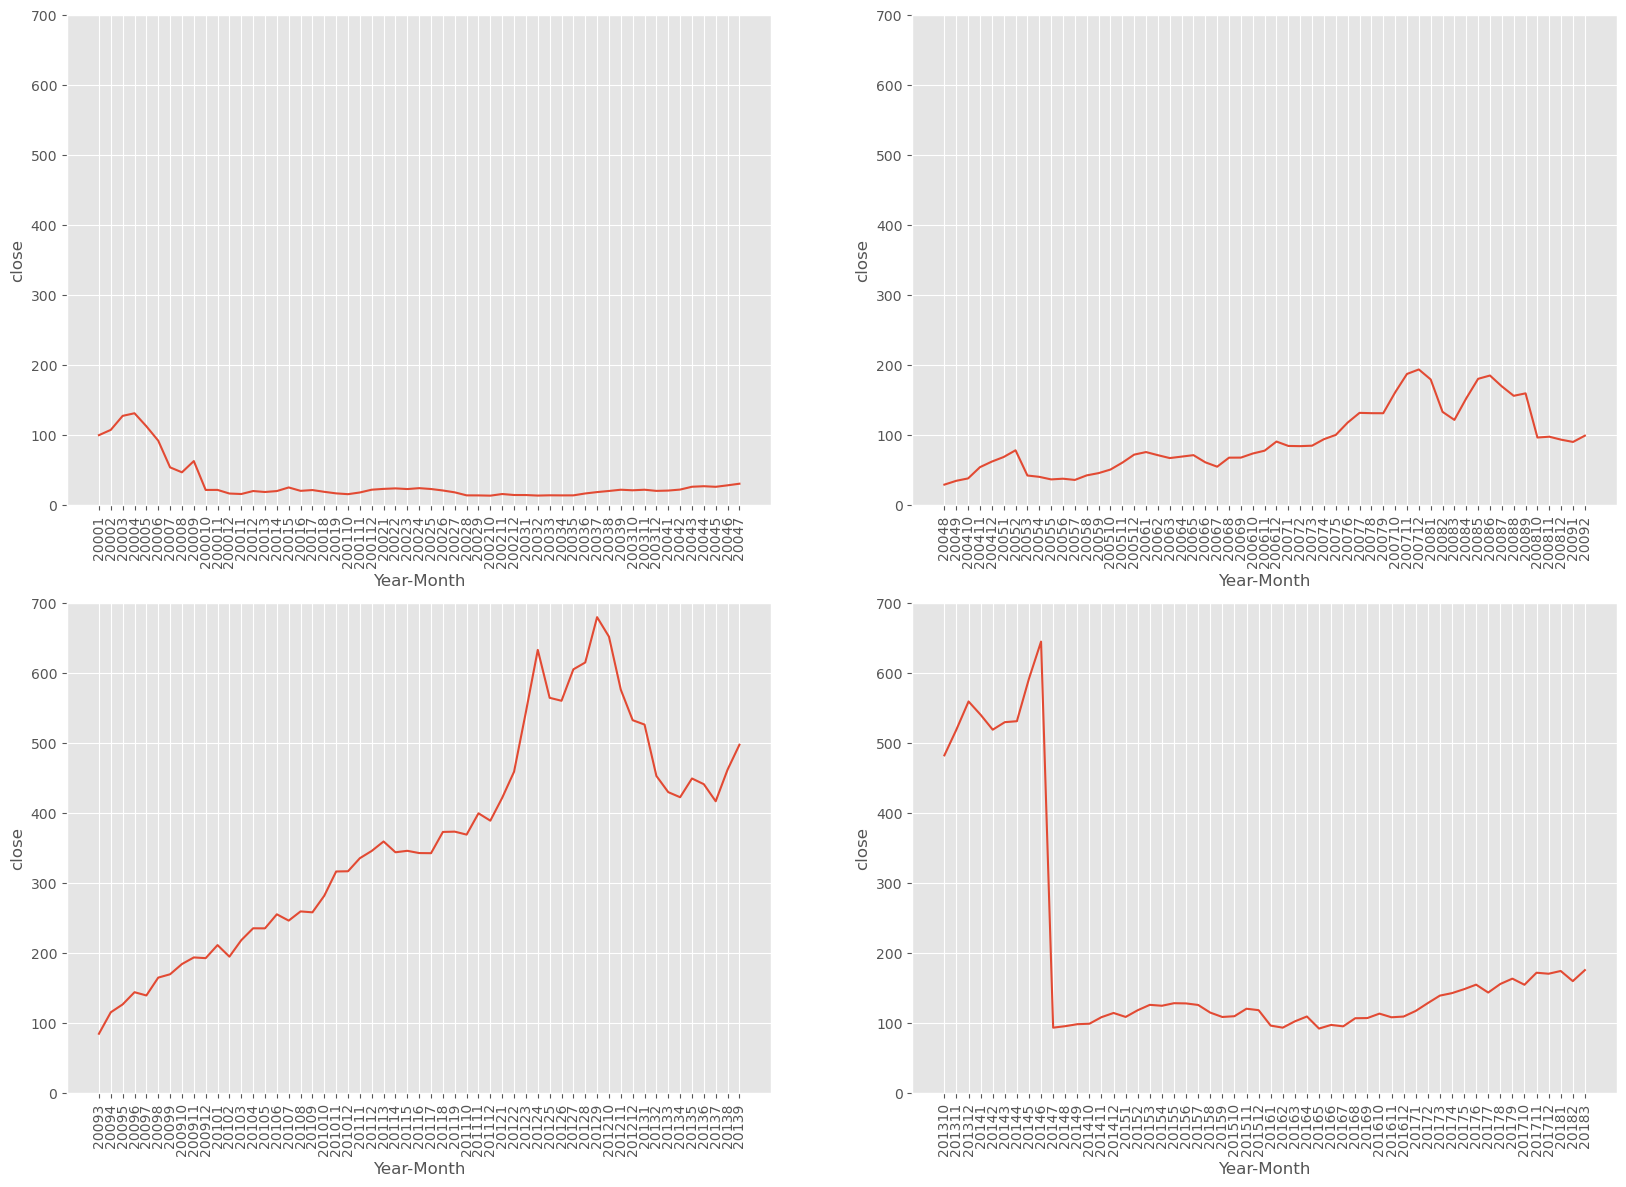

In [17]:
get_scatterplot(stock_agg,"close",[0,700])

- Iphone 3gs and macbook pro came out around May-June 2009 when the stock price rose meteorically.
- In June 2014 there was split in apple stock in ratio of 1:7 so each share was divided into 7 shares of equal value.

### Split Adjusted Stock Price

##### Stock price upto June 2014 needs to be divided by 7 in order to determine the split adjusted price and bring all values to same scale.

In [18]:
index = stock_agg.index[(stock_agg.year == 2014) & (stock_agg.month == 6)].to_list()[0]

In [19]:
split_adjusted_data = stock_agg.loc[0:index,'close']/7
split_adjusted_data = pd.concat([split_adjusted_data, stock_agg.loc[index+1:len(stock_agg), 'close']])

In [20]:
stock_agg['close'] = split_adjusted_data

In [21]:
stock_agg[(stock_agg.year<=2014)].tail(10)

,year,month,close,volume,yrmo
170,2014,3,75.777143,39435800,20143
171,2014,4,75.974286,35265900,20144
172,2014,5,84.654286,67823800,20145
173,2014,6,92.224286,58974500,20146
174,2014,7,94.030000,139168800,20147
175,2014,8,96.130000,236825000,20148
176,2014,9,98.970000,322672500,20149
177,2014,10,99.620000,247749150,201410
178,2014,11,109.010000,199952812,201411
179,2014,12,115.000000,266701088,201412


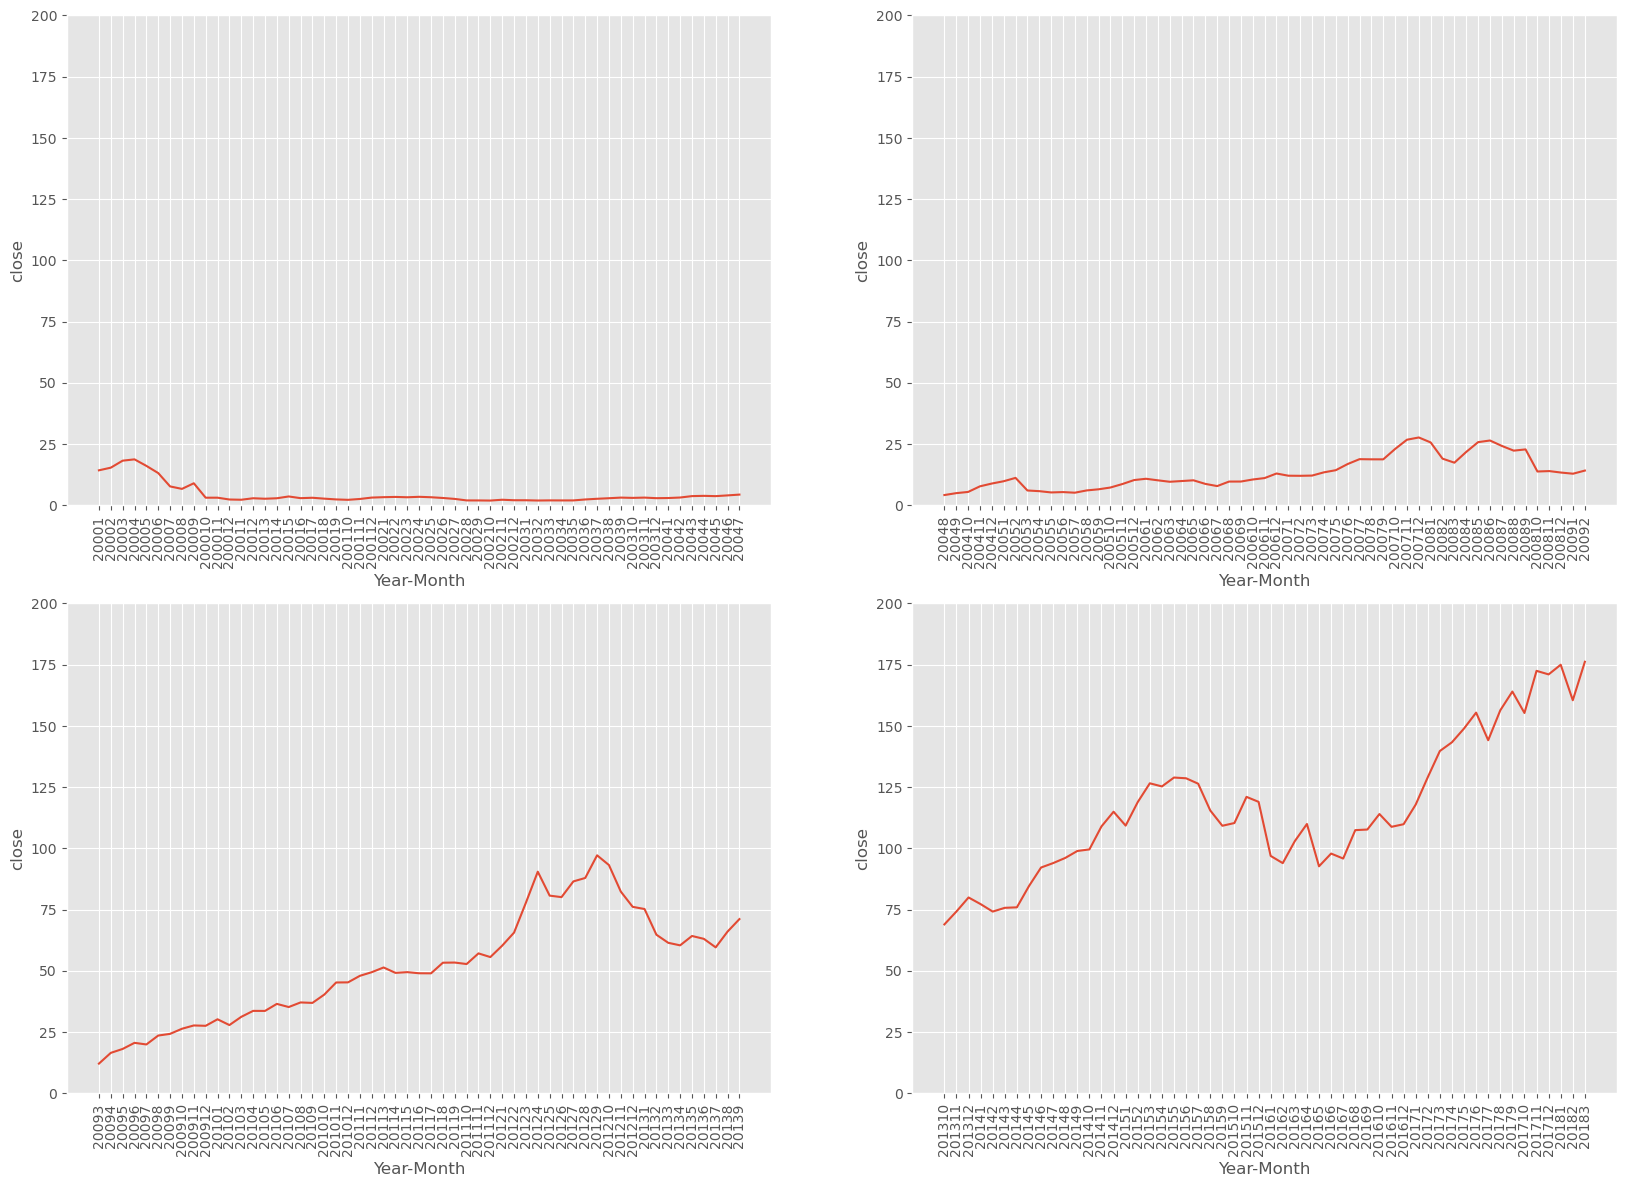

In [22]:
get_scatterplot(stock_agg,"close", [0,200])

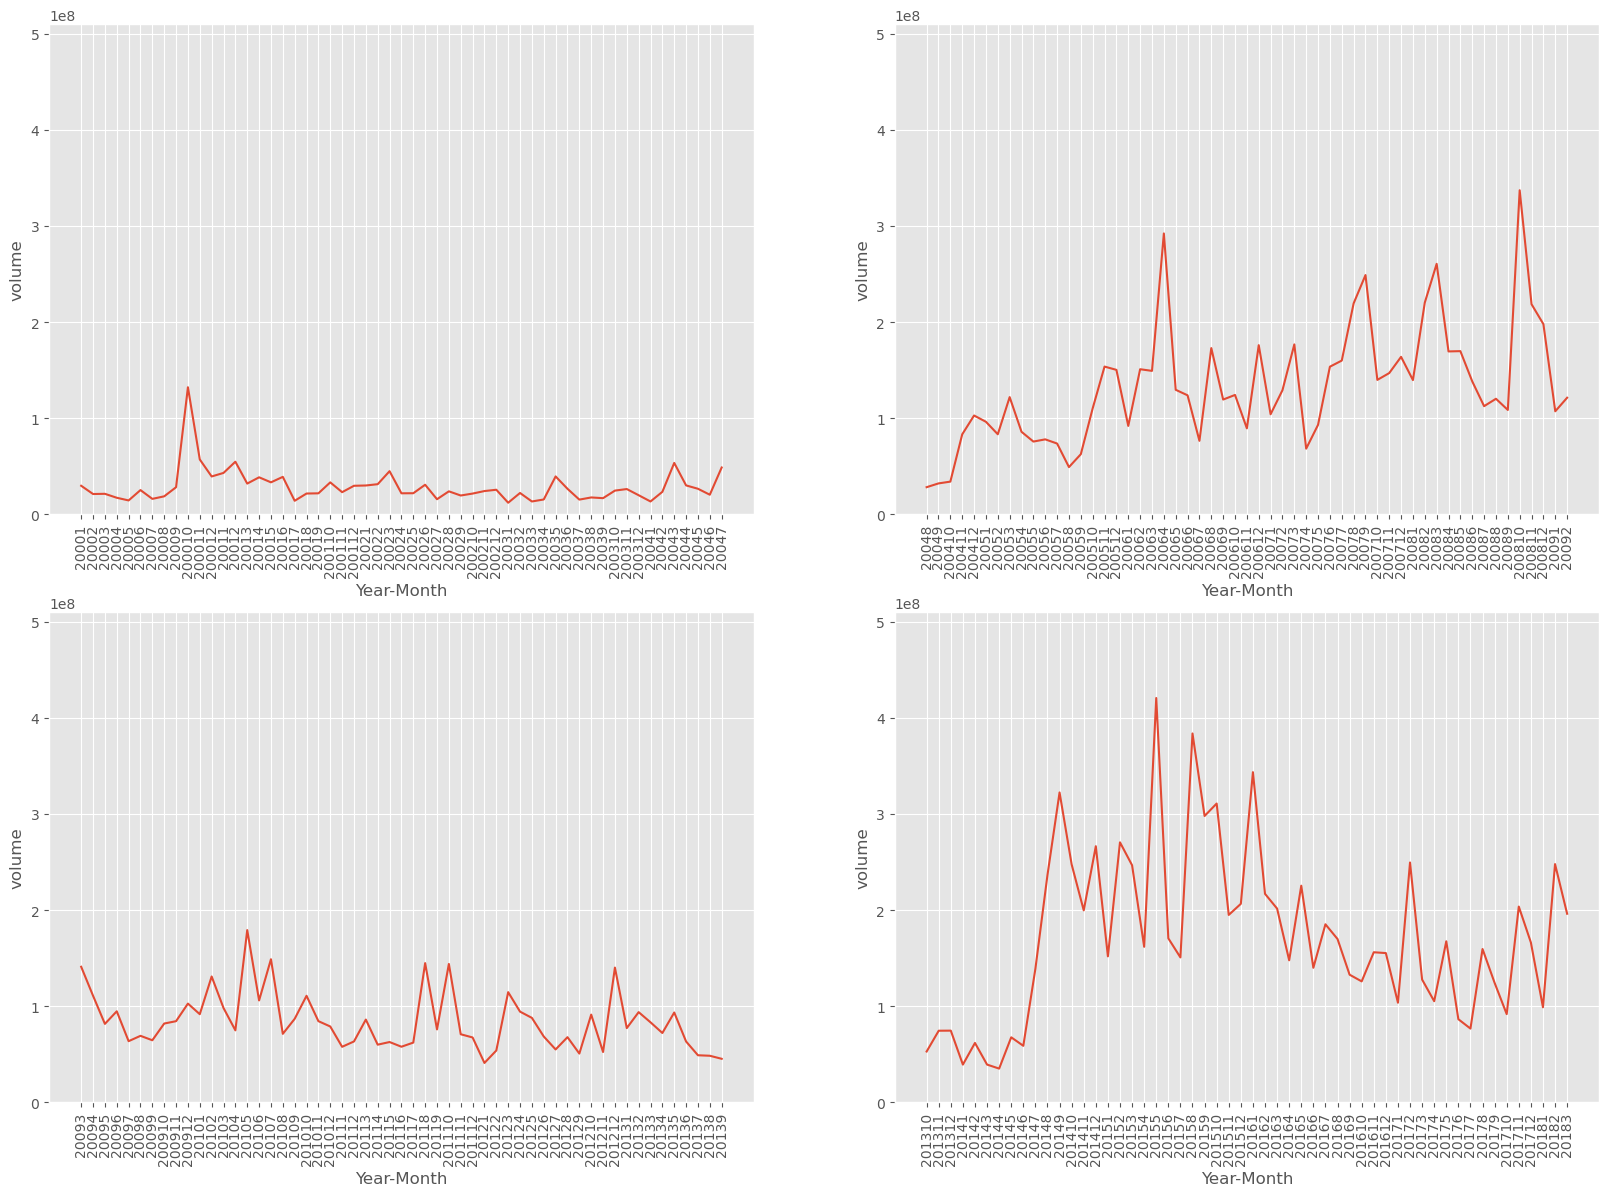

In [23]:
get_scatterplot(stock_agg,"volume",[0,510000000])

### Split Adjusted Volume

In [24]:
split_adjusted_volume = stock_agg.loc[0:index,'volume']*7
split_adjusted_volume = pd.concat([split_adjusted_volume,stock_agg.loc[index+1:len(stock_agg),'volume']])

In [25]:
stock_agg['volume'] = split_adjusted_volume

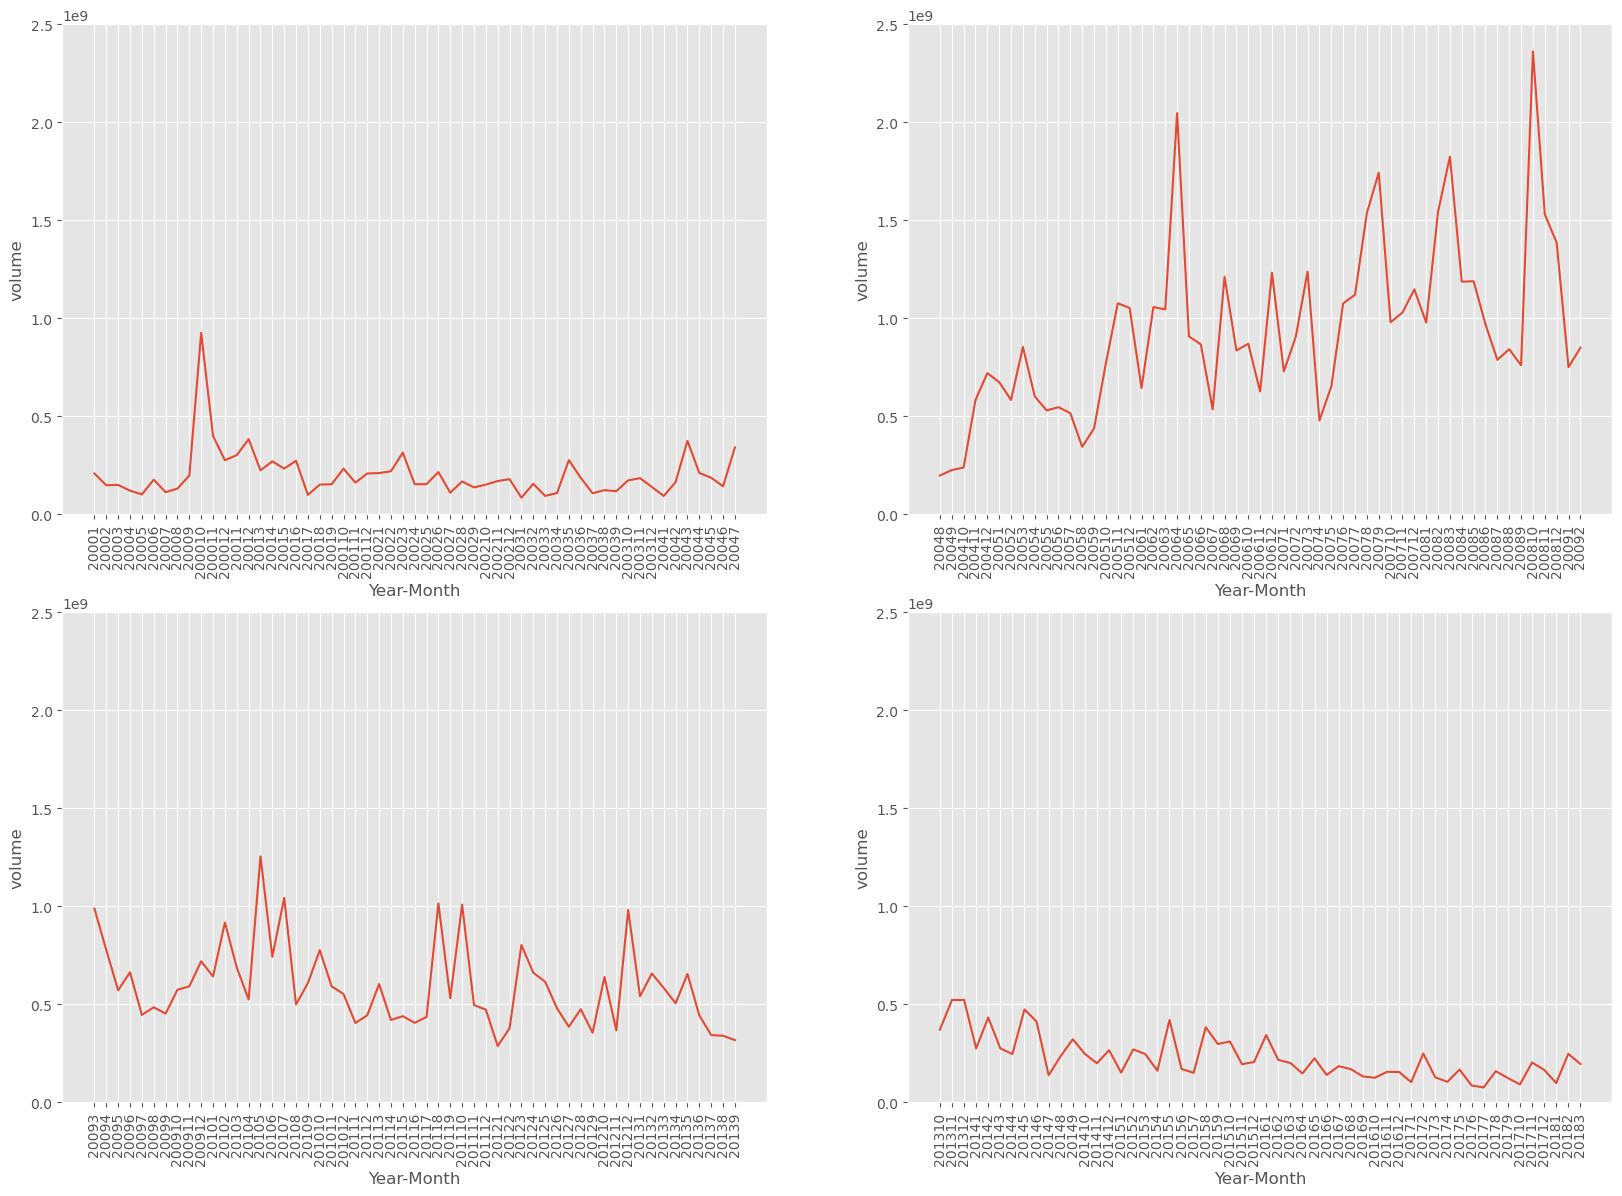

In [26]:
get_scatterplot(stock_agg, 'volume', [0,2500000000])

- If we see **2008 October** there is a large surge in volume which corresponds to a huge sell off of apple stock and corresponding fall in the price. This implies a negative correlation between volume and closing price. Let's confirm this with the correlation heatmap.

## Correlation Heatmap

In [27]:
corr = stock_agg[["close","volume"]].corr()

<Axes: >

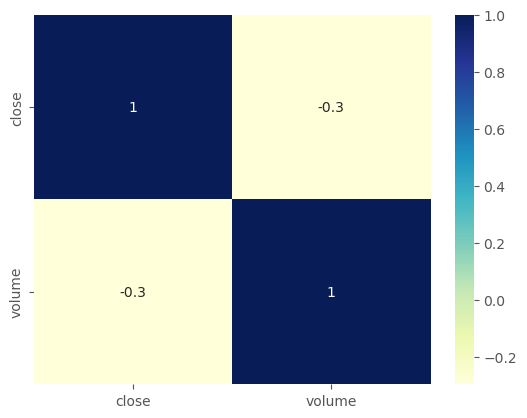

In [28]:
sbn.heatmap(corr, annot=True, cmap="YlGnBu")

## Lags, Moving Average and RSI based Features

- Moving average is the average price of the stock over past n time periods. It indicates movement of the stock and smoothens the price changes.


- RSI or relative strength indicator is the indicator of the fact that whether the stock is oversold or overbought.


- If the RSI is near 0 that means that the stock is over sold and is likely to rebound from its recent lows.


- if the RSI is near 100 it means that the stock is over bought and is likely to reverse to a downward trajectory.

In [29]:
for i in range(1,7):
    stock_agg['close_lag' + str(i)] = stock_agg['close'].shift(i)

In [30]:
stock_agg.head()

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN


In [31]:
import talib

Formula for RS = average gain over n periods/average loss over n periods

RSI = 100 - (100/(1 + RS))

In [32]:
for n in [3,6,9,12]:

    # Create the moving average and divide by the close price to average it out
    stock_agg['ma_' + str(n)] = talib.SMA(stock_agg['close'].values,
                              timeperiod = n) / stock_agg['close']
    # Create the RSI indicator
    stock_agg['rsi_' + str(n)] = talib.RSI(stock_agg['close'].values, timeperiod=n)
stock_agg.head(10)

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN,0.876146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN,0.930424,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN,1.098745,52.839423,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,6,13.222857,177703400,20006,16.160000,18.821429,18.285714,15.428571,14.348571,NaN,1.215176,29.673506,1.213393,NaN,NaN,NaN,NaN,NaN
6,2000,7,7.777143,113649200,20007,13.222857,16.160000,18.821429,18.285714,15.428571,14.348571,1.592701,13.370628,1.922208,28.825262,NaN,NaN,NaN,NaN
7,2000,8,6.768571,132244700,20008,7.777143,13.222857,16.160000,18.821429,18.285714,15.428571,1.367525,11.600109,1.995392,26.739658,NaN,NaN,NaN,NaN
8,2000,9,9.062857,198487100,20009,6.768571,7.777143,13.222857,16.160000,18.821429,18.285714,0.868327,39.111656,1.320644,38.822580,1.469683,NaN,NaN,NaN
9,2000,10,3.170000,926824500,200010,9.062857,6.768571,7.777143,13.222857,16.160000,18.821429,1.998047,17.785803,2.952756,25.738445,3.809924,27.383086,NaN,NaN


<Axes: >

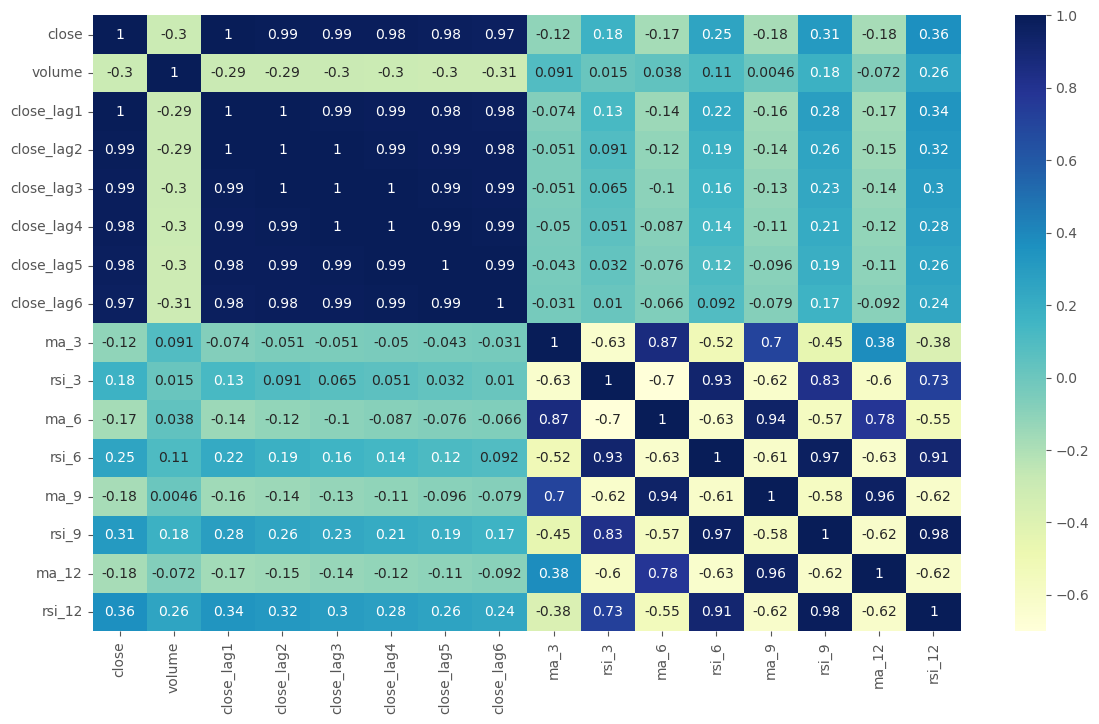

In [33]:
plt.figure(figsize=(14,8))
corr = stock_agg.drop(columns=["year","month","yrmo"]).corr()
sbn.heatmap(data=corr, annot=True, cmap="YlGnBu")

# Data Cleaning and Outlier Detection

#### Check for null or na on columns

In [34]:
stock_agg.isna().sum()

year           0
month          0
close          0
volume         0
yrmo           0
close_lag1     1
close_lag2     2
close_lag3     3
close_lag4     4
close_lag5     5
close_lag6     6
ma_3           2
rsi_3          3
ma_6           5
rsi_6          6
ma_9           8
rsi_9          9
ma_12         11
rsi_12        12
dtype: int64

In [35]:
stock_agg.dropna(inplace=True)
len(stock_agg)

207

In [36]:
stock_agg.isna().sum()

year          0
month         0
close         0
volume        0
yrmo          0
close_lag1    0
close_lag2    0
close_lag3    0
close_lag4    0
close_lag5    0
close_lag6    0
ma_3          0
rsi_3         0
ma_6          0
rsi_6         0
ma_9          0
rsi_9         0
ma_12         0
rsi_12        0
dtype: int64

In [37]:
# Computing IQR
Q1 = stock_agg[["close","volume"]].quantile(0.25)
Q3 = stock_agg[["close","volume"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

close     7.715500e+01
volume    4.739815e+08
dtype: float64


In [38]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')

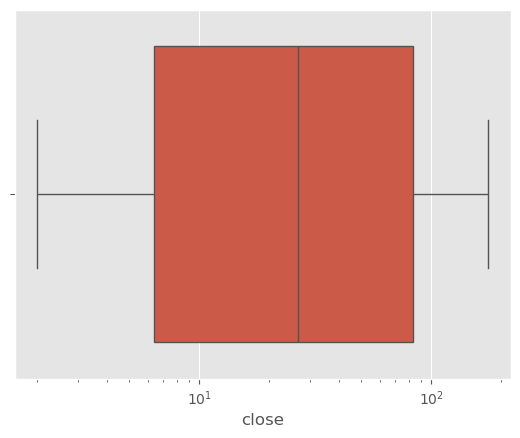

In [39]:
sbn.boxplot(x=stock_agg['close'], data=stock_agg)
plt.xscale("log")

In [40]:
len(stock_agg[stock_agg.close>Q3['close']+1.5*IQR[0]]) * 100/len(stock_agg)

0.0

In [41]:
len(stock_agg[stock_agg.close<Q1['close']-1.5*IQR[0]]) * 100/len(stock_agg)

0.0

<Axes: xlabel='volume'>

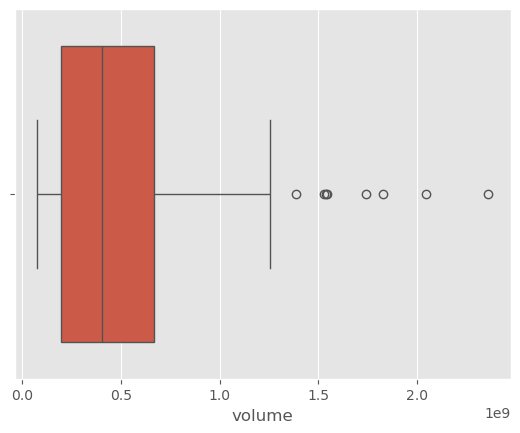

In [42]:
sbn.boxplot(x=stock_agg['volume'], data=stock_agg)

In [43]:
len(stock_agg[stock_agg.volume>Q3['volume'] + 1.5*IQR[1]]) * 100/len(stock_agg)

3.864734299516908

In [44]:
stock_agg = stock_agg[stock_agg.volume < stock_agg.volume.quantile(.95)]

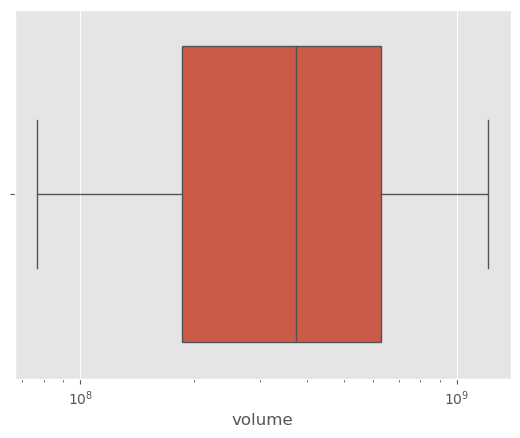

In [45]:
sbn.boxplot(x = stock_agg["volume"], data=stock_agg)
plt.xscale("log")

In [46]:
len(stock_agg[stock_agg.volume>Q3['volume'] + 1.5*IQR[1]]) * 100/len(stock_agg)

0.0

## Creating the features and independent variable

In [47]:
stock_agg.head()

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
12,2001,1,2.338571,302642200,20011,2.437143,3.178571,3.170000,9.062857,6.768571,7.777143,1.133781,15.092585,1.921095,24.078293,3.046291,26.265370,4.156791,26.507573
13,2001,2,2.945714,384461700,20012,2.338571,2.437143,3.178571,3.170000,9.062857,6.768571,0.873747,31.511451,1.308843,28.859313,1.919981,28.943696,2.946896,28.363782
14,2001,3,2.750000,224981400,20013,2.945714,2.338571,2.437143,3.178571,3.170000,9.062857,0.973853,28.817006,1.019394,28.173033,1.633478,28.567385,2.685844,28.114077
15,2001,4,2.941429,270841900,20014,2.750000,2.945714,2.338571,2.437143,3.178571,3.170000,0.978792,36.751619,0.940100,30.123383,1.344504,29.574912,2.061154,28.783068
16,2001,5,3.678571,234143700,20015,2.941429,2.750000,2.945714,2.338571,2.437143,3.178571,0.849061,61.524273,0.774369,37.913568,0.981748,33.630256,1.365372,31.462473


Right now we have derived various features from the dataset but we haven't augmented it with outside knowledge. Let's include one more feature which is whether that particular month had a special **Apple Event** or not.

In [48]:
import requests, bs4

In [49]:
req = requests.get("https://en.wikipedia.org/wiki/List_of_Apple_Inc._media_events")
soup = bs4.BeautifulSoup(req.text, "html.parser")
spans = soup.find_all('span', attrs={'class':'mw-headline'})
for span in spans[0:5]:
    print(span.text)

1984
Macintosh event (January 24, 1984)
Macintosh event (Boston Computer Society)
Apple II Forever event (April 1984)
1997


In [50]:
import calendar
months = list(calendar.month_name)[1:]

In [51]:
events = []
for span in spans:
    stxt = span.text
    for i, month in enumerate(months):
        if month in stxt:
            yr = stxt[-5:-1]
            events.append(yr+str(i+1))
print(events)

['19841', '19844', '19971', '19985', '19991', '19995', '19997', '199910', '20001', '20007', '20021', '20027', '20029', '20031', '20036', '20039', '20046', '20046', '200410', 'isco1', '20056', '20059', '200510', '20061', '20062', '20068', '20069', '20071', '20076', '20078', '20079', '20081', '20083', '20086', '20089', '200810', '20091', '20096', '20099', '20101', '20104', '20106', '20109', '201010', '20113', '20116', '201110', '20123', '20126', '20129', '201210', '20136', '20139', '201310', '20146', '20149', '201410', '20153', '20156', '20159', '20163', '20166', '20169', '201610', '20176', '20179', '20183', '20186', '20189', '201810', '20193', '20196', '20199', '20206', '20209', '202010', '202011', '20214', '20216', '20219', '202110', '20223', '20226', '20229', '20236', '20239', '202310', '20245', '20246']


So we have all the events let's merge it with our dataframe

In [52]:
stock_agg['event'] = stock_agg['yrmo'].apply(lambda ymo : 1 if ymo in events else 0)
stock_agg[['yrmo','event']].head(20)

,yrmo,event
12,20011,0
13,20012,0
14,20013,0
15,20014,0
16,20015,0
17,20016,0
18,20017,0
19,20018,0
20,20019,0
21,200110,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_11536\3641589125.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(stock_agg.loc[stock_agg.event==0,'close'], hist=False, rug=True,label='No Events')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11536\3641589125.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

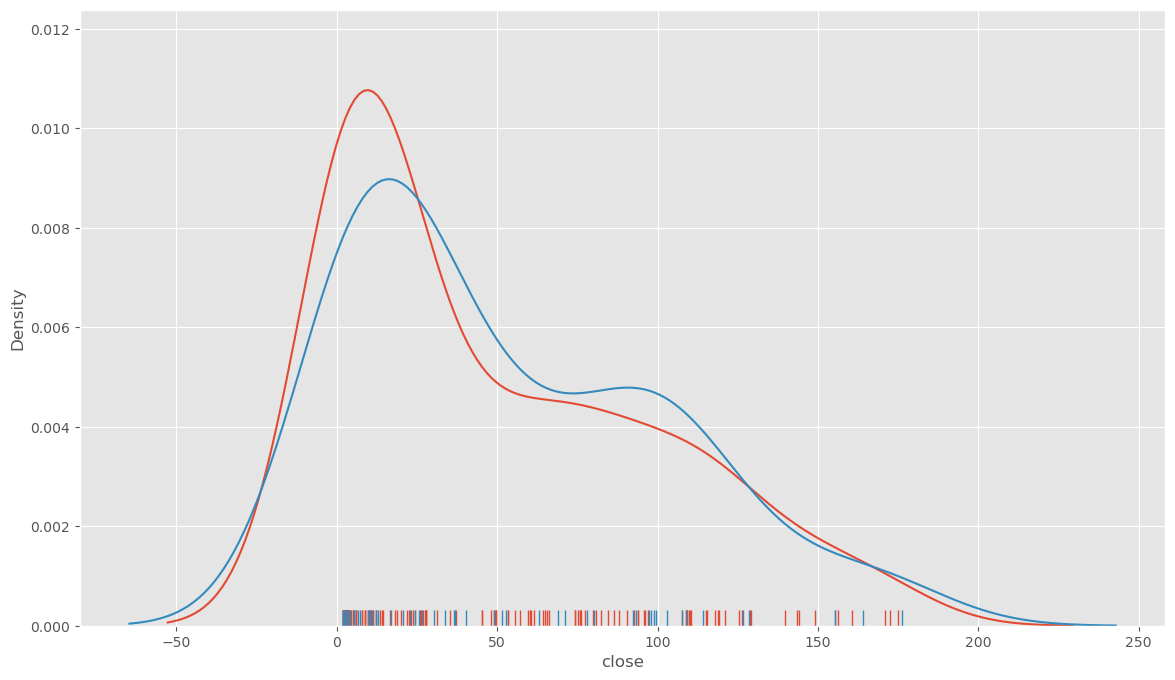

In [72]:
plt.figure(figsize=(14,8))
sbn.distplot(stock_agg.loc[stock_agg.event==0,'close'], hist=False, rug=True,label='No Events')
sbn.distplot(stock_agg.loc[stock_agg.event==1,'close'], hist=False, rug=True, label='Events')
plt.show()

In [54]:
print("Event Mean ",stock_agg.loc[stock_agg.event==1,:]['close'].mean())
print("Non Event Mean ",stock_agg.loc[stock_agg.event==0,:]['close'].mean())

Event Mean  53.029420168067226
Non Event Mean  49.012828472906406


<Axes: >

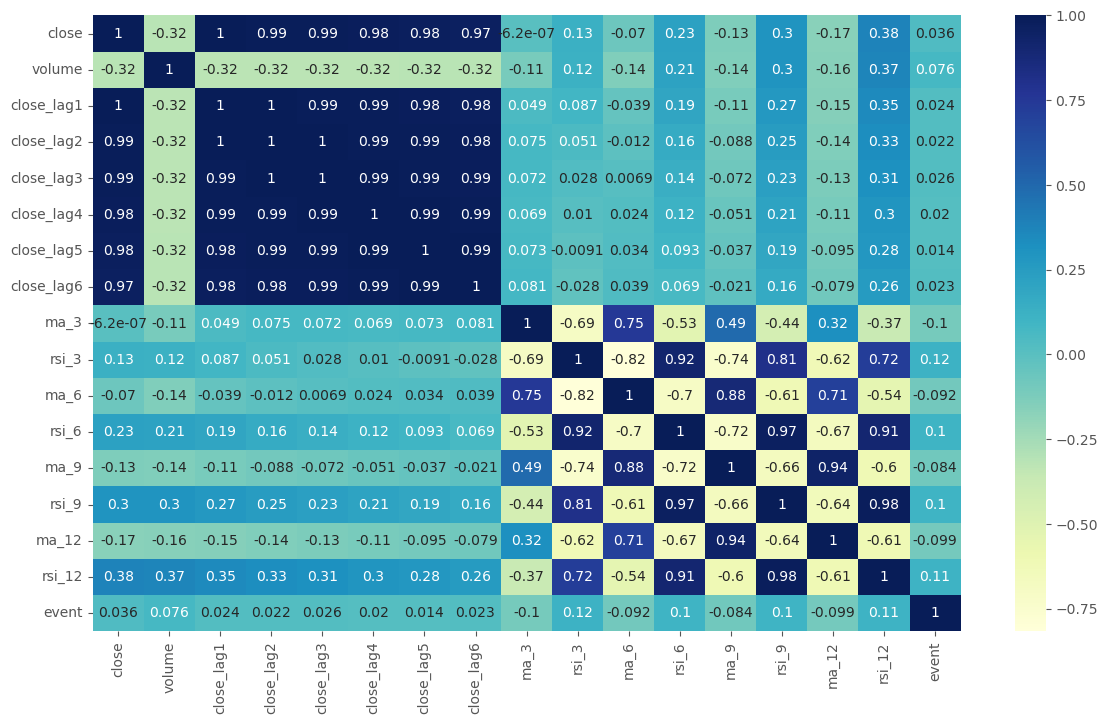

In [57]:
plt.figure(figsize=(14,8))
corr = stock_agg.drop(columns=["year","month","yrmo"]).corr()
sbn.heatmap(data=corr, annot=True, cmap="YlGnBu")

So we do see a positive correlation between the events and closing price, so this could be a driver variable.

##### We are trying to predict the closing price so it will become our independent variable.

## Prepare The Data For Modelling

In [58]:
from sklearn.model_selection import train_test_split

Dropping **time** columns as they do not have significance as a driver for closing price.

In [59]:
stock_final = stock_agg.drop(columns = ["year","month","yrmo"], axis = 1)

In [60]:
stock_final.head()

,close,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event
12,2.338571,302642200,2.437143,3.178571,3.170000,9.062857,6.768571,7.777143,1.133781,15.092585,1.921095,24.078293,3.046291,26.265370,4.156791,26.507573,0
13,2.945714,384461700,2.338571,2.437143,3.178571,3.170000,9.062857,6.768571,0.873747,31.511451,1.308843,28.859313,1.919981,28.943696,2.946896,28.363782,0
14,2.750000,224981400,2.945714,2.338571,2.437143,3.178571,3.170000,9.062857,0.973853,28.817006,1.019394,28.173033,1.633478,28.567385,2.685844,28.114077,0
15,2.941429,270841900,2.750000,2.945714,2.338571,2.437143,3.178571,3.170000,0.978792,36.751619,0.940100,30.123383,1.344504,29.574912,2.061154,28.783068,0
16,3.678571,234143700,2.941429,2.750000,2.945714,2.338571,2.437143,3.178571,0.849061,61.524273,0.774369,37.913568,0.981748,33.630256,1.365372,31.462473,0


#### Normalise the data

In [61]:
stock_n = stock_final.loc[:, stock_final.columns != 'close']

In [62]:
stock_n = (stock_n - stock_n.mean()) / stock_n.std()

In [63]:
stock_m = pd.concat([stock_n,stock_final.loc[:,'close']],axis=1)

In [64]:
stock_m.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
12,-0.472011,-0.963632,-0.940420,-0.936495,-0.807920,-0.856290,-0.830189,1.835873,-1.864310,6.123602,-1.888979,8.547623,-1.938234,8.754225,-1.968746,-0.591548,2.338571
13,-0.197822,-0.965667,-0.955899,-0.936313,-0.935017,-0.805886,-0.852659,-1.296160,-1.248793,2.197776,-1.657659,3.925119,-1.790431,5.429749,-1.858903,-0.591548,2.945714
14,-0.732264,-0.953127,-0.957957,-0.952038,-0.934833,-0.935348,-0.801544,-0.090417,-1.349804,0.341803,-1.690864,2.749278,-1.811198,4.712446,-1.873680,-0.591548,2.750000
15,-0.578579,-0.957170,-0.945282,-0.954129,-0.950824,-0.935160,-0.932833,-0.030923,-1.052348,-0.166636,-1.596500,1.563297,-1.755597,2.995961,-1.834092,-0.591548,2.941429
16,-0.701560,-0.953216,-0.949368,-0.941252,-0.952950,-0.951449,-0.932642,-1.593491,-0.123660,-1.229322,-1.219587,0.074504,-1.531803,1.084133,-1.675536,-0.591548,3.678571


In [65]:
stock_m.to_csv("apple_stock_prepared.csv",index=False)

In [66]:
X = stock_m.loc[:, stock_m.columns != 'close']
Y = stock_m['close']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42, test_size=0.2)

In [68]:
print("Length Of training data ", len(X_train))
print("Length Of test data ", len(X_test))
print("Length Of training Y ", len(Y_train))
print("Length Of test data Y", len(Y_test))

Length Of training data  156
Length Of test data  40
Length Of training Y  156
Length Of test data Y 40


So we have made our data ready for training. The only thing that is left is to plug in this data through a model for prediction which we will see in subsequent sections.